# MEDICAL COST PREDICTION:

Problem Statement
We will be predicting the medical charges for different paitents based on features like gender , age , bmi etc. Below are the features captured in our dataset. The dataset is taken from kaggle.


# Features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [4]:
df.shape

(1338, 7)

*There are 1338 observations and 7 attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
missing_df = pd.DataFrame({'count':df.isna().sum(),'percent':df.isna().sum()/len(df)})
missing_df

,count,percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# OUTLIERS

In [9]:
df_num=df[['age','bmi','children']]

Q1 = df_num.quantile(0.25)

Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

df_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


print('Shape of the data before handling outliers : ',df.shape)
print('Shape of the data after handling outliers : ',df_outliers.shape)

Shape of the data before handling outliers :  (1338, 7)
Shape of the data after handling outliers :  (1329, 7)


# Univariate Analysis

In [10]:
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

In [11]:
numerical =['age','bmi','charges','children']
categorical=['smoker','region','sex']

In [12]:
def univariate_analysis_categorical(cat, i):
    print(f"\t\t{style.BOLD}Univariate Analysis of {cat}")
    print(f"-----------------------------------------------------------{style.END}")
    print(f"{i+1}. No of unique values in {style.BOLD}{cat}{style.END} are: {df[cat].nunique()}. \nThe distribution is as follows:")
    print(f"{style.BOLD}{cat}{style.END}\n{df[cat].value_counts()}\n")
    vc = df[cat].value_counts()
    if len(vc.index)<=5:
        g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>5 and len(vc.index)<=15:
        g = sns.countplot(y=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>15:
        g = sns.countplot(x=cat, data=df, palette = 'pastel',order = df[cat].value_counts().index)
        g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
    plt.show()
    print("\t")

In [13]:
def univariate_analysis_numerical(num, i):
    print(f"\t\t{style.BOLD}Univariate Analysis of {num}")
    print(f"-----------------------------------------------------------{style.END}")
    print(f"{style.BOLD}{num}{style.END}\n")
    print(f"{style.BOLD}The distribution of {num} is as follows:")
    print(sns.boxplot(x=df[num]))
    plt.show()
    print(f"{style.BOLD}The distribution of {num} is as follows:")
    print(sns.distplot(x=df[num]))
    plt.show()
    print("\t")

		Univariate Analysis of smoker
-----------------------------------------------------------
1. No of unique values in smoker are: 2. 
The distribution is as follows:
smoker
no     1064
yes     274
Name: smoker, dtype: int64



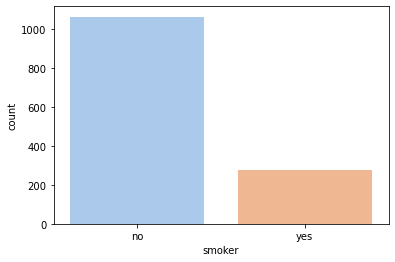

	
		Univariate Analysis of region
-----------------------------------------------------------
2. No of unique values in region are: 4. 
The distribution is as follows:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



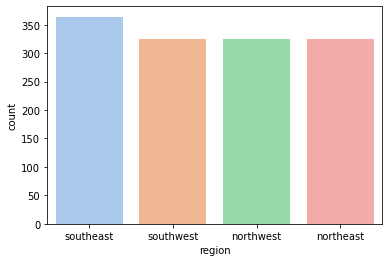

	
		Univariate Analysis of sex
-----------------------------------------------------------
3. No of unique values in sex are: 2. 
The distribution is as follows:
sex
male      676
female    662
Name: sex, dtype: int64



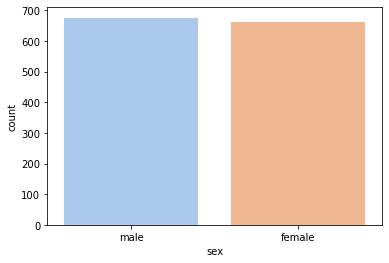

In [14]:
for i,x in enumerate(categorical):
        univariate_analysis_categorical(x, i) 

		Univariate Analysis of age
-----------------------------------------------------------
age

The distribution of age is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


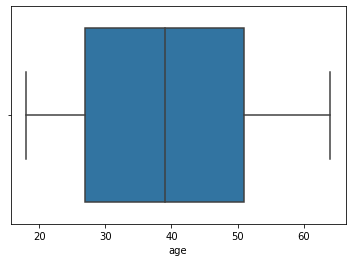

The distribution of age is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


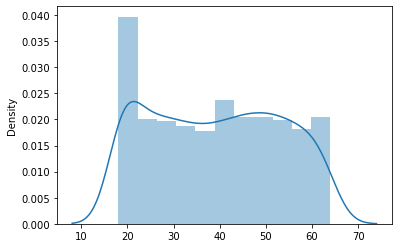

	
		Univariate Analysis of bmi
-----------------------------------------------------------
bmi

The distribution of bmi is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


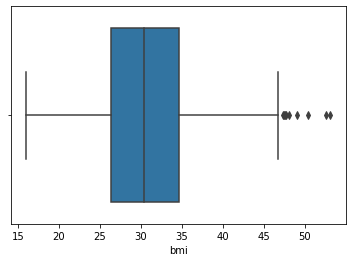

The distribution of bmi is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


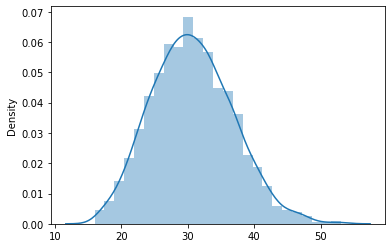

	
		Univariate Analysis of charges
-----------------------------------------------------------
charges

The distribution of charges is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


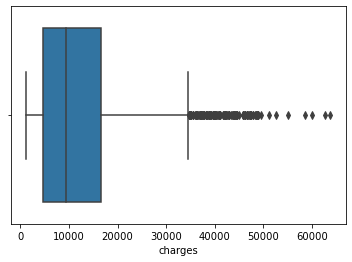

The distribution of charges is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


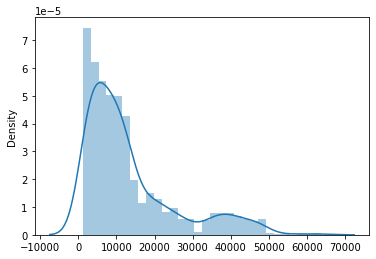

	
		Univariate Analysis of children
-----------------------------------------------------------
children

The distribution of children is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


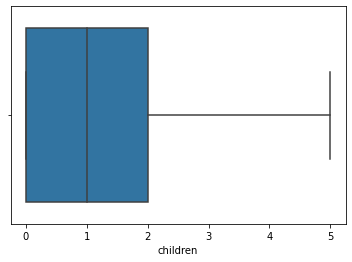

The distribution of children is as follows:
AxesSubplot(0.125,0.125;0.775x0.755)


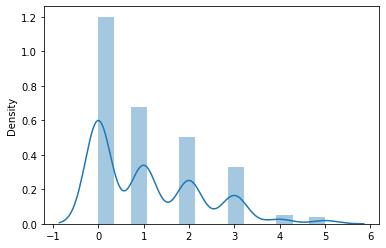

In [15]:
for i,x in enumerate(numerical):
        univariate_analysis_numerical(x, i) 

# Bivariate Analysis

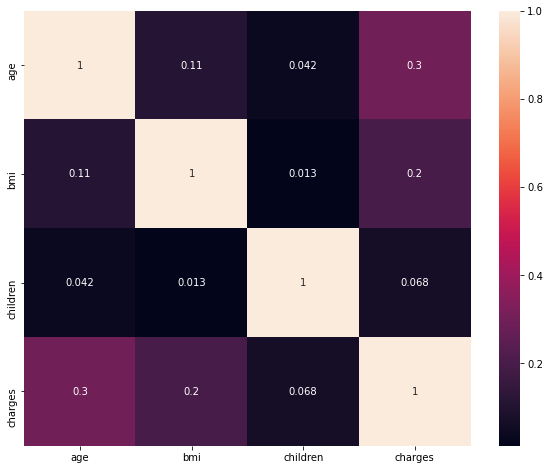

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

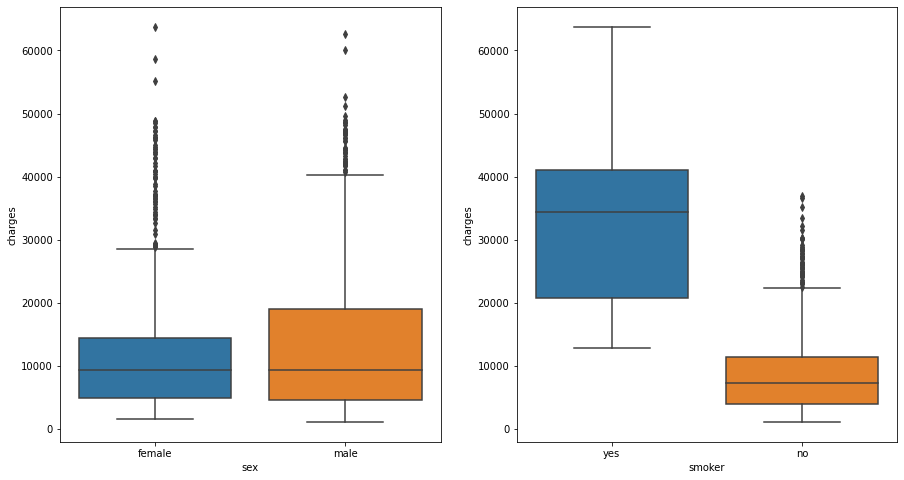

In [17]:
fig , ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(df['sex'],df['charges'],ax=ax[0])
sns.boxplot(df['smoker'],df['charges'],ax=ax[1])
plt.show()

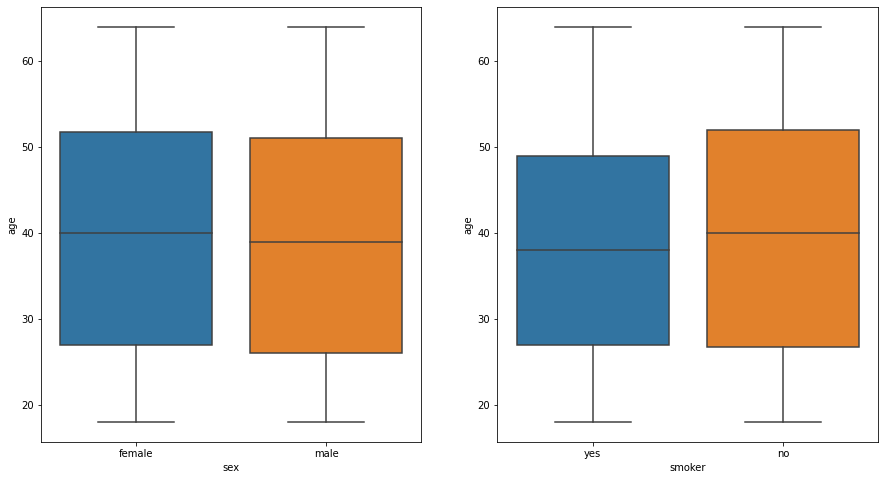

In [18]:
fig , ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(df['sex'],df['age'],ax=ax[0])
sns.boxplot(df['smoker'],df['age'],ax=ax[1])
plt.show()

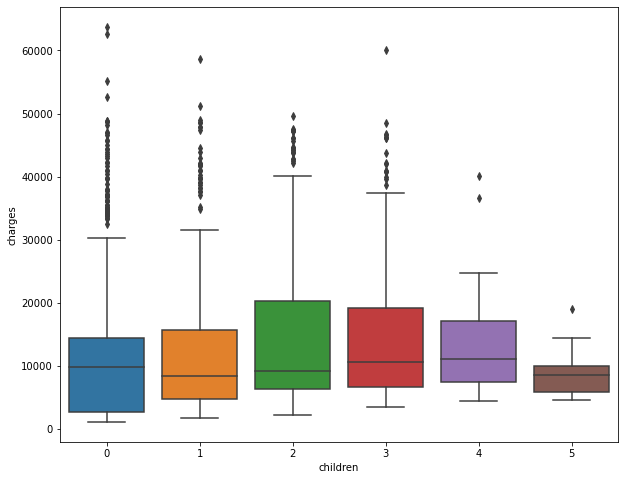

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(df['children'],df['charges'])
plt.show()

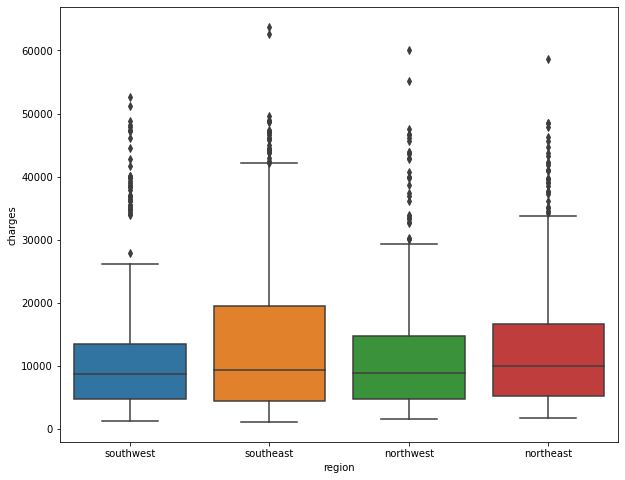

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(df['region'],df['charges'])
plt.show()

# Multivariate Analysis

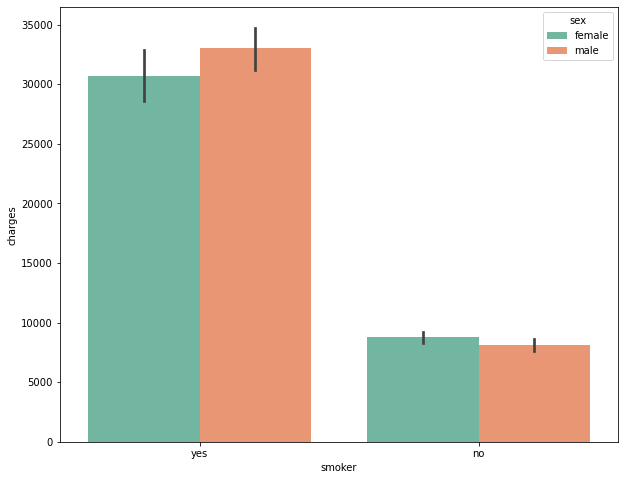

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(df['smoker'],df['charges'],hue='sex',data=df,palette='Set2')
plt.show()

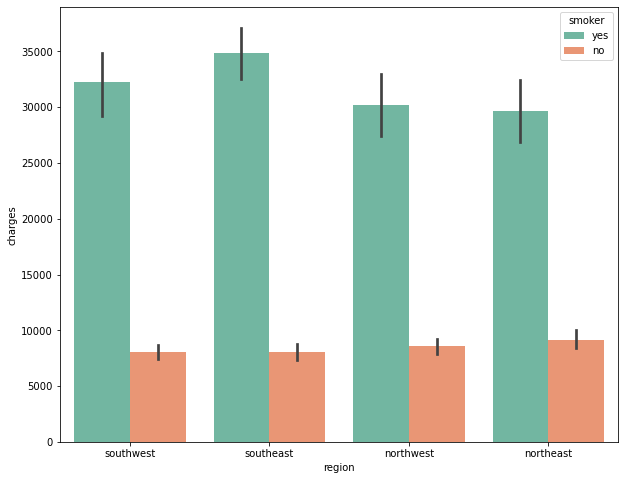

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(df['region'],df['charges'],hue='smoker',data=df,palette='Set2')
plt.show()

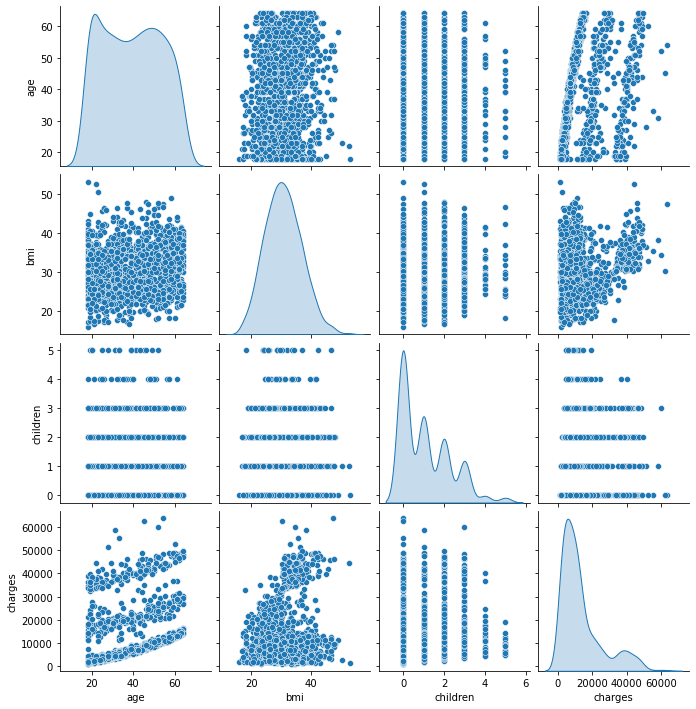

In [23]:
plt.rcParams['figure.figsize'] = (22,7)
sns.pairplot(df,diag_kind='kde')
plt.show()

# ENCODING

In [24]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode.sample(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
62,64,24.70,1,30166.61817,1,0,1,0,0
362,19,21.70,0,13844.50600,0,1,0,0,1
555,28,23.80,2,3847.67400,1,0,0,0,1
98,56,19.95,0,22412.64850,1,1,0,0,0
720,51,40.66,0,9875.68040,0,0,0,0,0


# DATA PREPARATION

In [25]:
X = df_encode.drop('charges',1)
y = df_encode.charges

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

print('X Train shape: ',x_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Train shape: ',y_train.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (1070, 8)
X Test shape:  (268, 8)
Y Train shape:  (1070,)
Y Test shape:  (268,)


# MODEL BUILDING

In [26]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)
mse_train = mean_squared_error(y_train,ypred_train)
mse_test = mean_squared_error(y_test,ypred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test,ypred_test),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test,2))

R Square
--------------------------
0.8


RMSE of Train Data
--------------------------
6140.16


RMSE of Test Data
--------------------------
5641.63


In [27]:
X_l = df_encode.drop('charges',1)
X_l = sm.add_constant(X_l)
y_l = df_encode.charges

x_train_l,x_test_l,y_train_l,y_test_l = train_test_split(X_l,y_l,test_size=0.20,random_state=10)

In [28]:
model_l=sm.OLS(y_train_l,x_train_l).fit()
model_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     428.5
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:10:57   Log-Likelihood:                -10812.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1061   BIC:                         2.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.272e+04   1068.346    -11.904      0.000   -1.48e+04   -1.06e+04
age                259.5474     13.013     19.946      0.000     234.014     285.081
bmi                353.0377     31.141     11.337      0.000     291.932     414.143
children           543.2893    150.674      3.606      0.000     247.636     838.942
sex_male          -254.3976    366.133     -0.695      0.487    -972.825     464.030
smoker_yes        2.412e+04    455.121     53.006      0.000    2.32e+04     2.5e+04
region_northwest  -192.0025    519.443     -0.370      0.712   -1211.254     827.249
region_southeast  -896.1336    520.833     -1.721      0.086   -1918.113     125.846
region_southwest  -618.2897    519.929     -1.189      0.235   -1638.497     401.917
==============================================================================
Omnibus:                      228.399   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.981
Skew:                           1.149   Prob(JB):                    9.15e-118
Kurtosis:                       5.609   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
def adj_r(ytest,ypred):
    result = 1 - (1-r2_score(ytest,ypred))*(len(y)-1)/(len(y)-X.shape[1]-1)
    return result

In [30]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE Train','RMSE Test'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test


In [31]:
base_model_sklearn = pd.Series({'Model_Name' : 'Base Model Sklearn',
           'R-Squared' : r2_score(y_test,ypred_test),
           'Adj. R-Squared' : adj_r(y_test,ypred_test),
           'RMSE Train' : rmse_train,
           'RMSE Test' : rmse_test})

score_card=score_card.append(base_model_sklearn,ignore_index=True)

score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559


# DISTRIBUTION OF TARGET

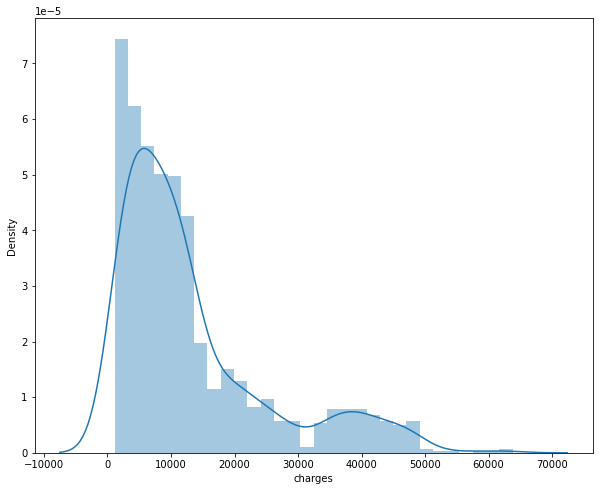

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df['charges'])
plt.show()

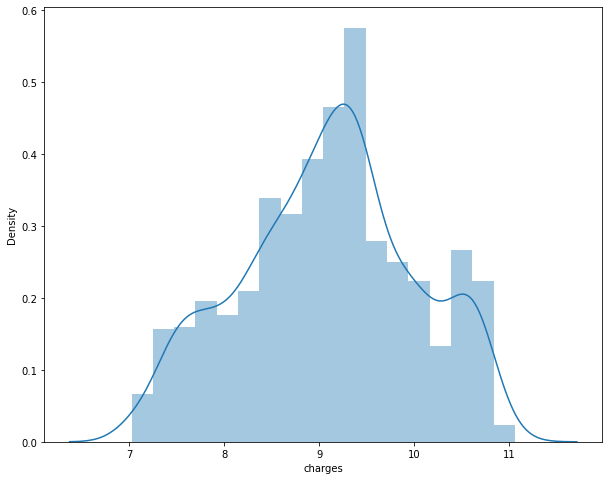

In [33]:
target_log = np.log(df['charges'])
plt.figure(figsize=(10,8))
sns.distplot(target_log)
plt.show()

In [34]:
X_log = df_encode.drop('charges',1)
y_log = target_log

x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.20,random_state=0)

print('X Train shape: ',x_train_log.shape)
print('X Test shape: ',x_test_log.shape)
print('Y Train shape: ',y_train_log.shape)
print('Y Test shape: ',y_test_log.shape)

X Train shape:  (1070, 8)
X Test shape:  (268, 8)
Y Train shape:  (1070,)
Y Test shape:  (268,)


In [35]:
lr = LinearRegression()
model_log = lr.fit(x_train_log,y_train_log)
ypred_train_log = model_log.predict(x_train_log)
ypred_test_log = model_log.predict(x_test_log)

predicted_val_train = np.exp(ypred_train_log)
predicted_val_test = np.exp(ypred_test_log)

mse_train_log = mean_squared_error(y_train,predicted_val_train)
mse_test_log = mean_squared_error(y_test,predicted_val_test)

rmse_train_log = np.sqrt(mse_train_log)
rmse_test_log = np.sqrt(mse_test_log)

print(f"{style.BOLD}R Square")
print('--------------------------')
print((r2_score(y_test,predicted_val_test)))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(rmse_train_log)
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(rmse_test_log)

R Square
--------------------------
0.5466423980693161


RMSE of Train Data
--------------------------
8370.445972552418


RMSE of Test Data
--------------------------
8493.690488455471


In [36]:
target_log_sklearn = pd.Series({'Model_Name' : 'Target Log Model',
           'R-Squared' : r2_score(y_test,predicted_val_test),
           'Adj. R-Squared' : adj_r(y_test,predicted_val_test),
           'RMSE Train' : rmse_train_log,
           'RMSE Test' : rmse_test_log})

score_card=score_card.append(target_log_sklearn,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488


# FEATURE SELECTION 
FORWARD SELECTION

In [37]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

# Build step forward feature selection/backward elimination
sfs1 = sfs(linR, k_features=6, forward=True,scoring='r2', cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [38]:
sfs1.k_feature_names_

('0', '1', '2', '4', '6', '7')

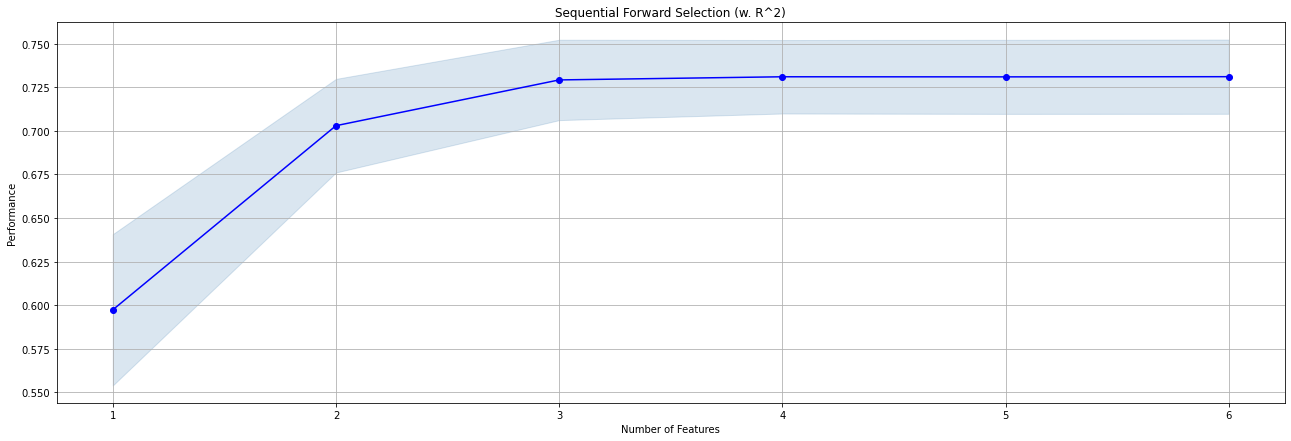

In [39]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [40]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

# Build step forward feature selection/backward elimination
sfs2 = sfs(linR, k_features=6, forward=False,scoring='r2', cv=5)

# Perform SFFS
sfs2 = sfs2.fit(x_train.values, y_train.values)

In [41]:
sfs2.k_feature_names_

('0', '1', '2', '4', '6', '7')

In [42]:
lr = LinearRegression()
lr.fit(x_train.values, y_train.values)

rfe_model = RFECV(estimator=lr, min_features_to_select=1)


rfe_model = rfe_model.fit(x_train.values, y_train.values)
 
feat_index = pd.Series(data = rfe_model.ranking_, index = X.columns)

signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['age', 'bmi', 'children', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [43]:
model_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     428.5
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:12:30   Log-Likelihood:                -10812.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1061   BIC:                         2.169e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.272e+04   1068.346    -11.904      0.000   -1.48e+04   -1.06e+04
age                259.5474     13.013     19.946      0.000     234.014     285.081
bmi                353.0377     31.141     11.337      0.000     291.932     414.143
children           543.2893    150.674      3.606      0.000     247.636     838.942
sex_male          -254.3976    366.133     -0.695      0.487    -972.825     464.030
smoker_yes        2.412e+04    455.121     53.006      0.000    2.32e+04     2.5e+04
region_northwest  -192.0025    519.443     -0.370      0.712   -1211.254     827.249
region_southeast  -896.1336    520.833     -1.721      0.086   -1918.113     125.846
region_southwest  -618.2897    519.929     -1.189      0.235   -1638.497     401.917
==============================================================================
Omnibus:                      228.399   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.981
Skew:                           1.149   Prob(JB):                    9.15e-118
Kurtosis:                       5.609   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_l.pvalues[model_l.pvalues<0.05].index

Index(['const', 'age', 'bmi', 'children', 'smoker_yes'], dtype='object')

In [46]:
X_sig= df_encode.drop(['charges','sex_male','region_northwest','region_southeast','region_southwest'],1)
y_sig = df.charges

x_train_sig,x_test_sig,y_train_sig,y_test_sig = train_test_split(X_sig,y_sig,test_size=0.20,random_state=0)

print('X Train shape: ',x_train_sig.shape)
print('X Test shape: ',x_test_sig.shape)
print('Y Train shape: ',y_train_sig.shape)
print('Y Test shape: ',y_test_sig.shape)

X Train shape:  (1070, 4)
X Test shape:  (268, 4)
Y Train shape:  (1070,)
Y Test shape:  (268,)


In [47]:
lr = LinearRegression()
model_sig = lr.fit(x_train_sig,y_train_sig)

ypred_train_sig = model_sig.predict(x_train_sig)
ypred_test_sig = model_sig.predict(x_test_sig)

mse_train_sig = mean_squared_error(y_train_sig,ypred_train_sig)
mse_test_sig = mean_squared_error(y_test_sig,ypred_test_sig)

rmse_train_sig = np.sqrt(mse_train_sig)
rmse_test_sig = np.sqrt(mse_test_sig)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test_sig,ypred_test_sig),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_sig,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_sig,2))

R Square
--------------------------
0.798


RMSE of Train Data
--------------------------
6150.52


RMSE of Test Data
--------------------------
5672.01


In [48]:
sig_model = pd.Series({'Model_Name' : 'Model with Significant Feature',
           'R-Squared' : r2_score(y_test_sig,ypred_test_sig),
           'Adj. R-Squared' : adj_r(y_test_sig,ypred_test_sig),
           'RMSE Train' : rmse_train_sig,
           'RMSE Test' : rmse_test_sig})

score_card=score_card.append(sig_model,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981


# Polynomial Regression

In [49]:
#Grouping non linear features to raise degree.
x_nonlinear=df_encode[['age', 'bmi', 'children','smoker_yes']]
y_p=df.charges

#Genearting polynomial features and loading it as a dataframe
quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(x_nonlinear)

X_train_p,X_test_p,y_train_p,y_test_p = train_test_split(x_quad,y_p,test_size=0.20 ,random_state = 0)

print('X Train shape: ',X_train_p.shape)
print('X Test shape: ',X_test_p.shape)
print('Y Train shape: ',y_train_p.shape)
print('Y Test shape: ',y_test_p.shape)

X Train shape:  (1070, 15)
X Test shape:  (268, 15)
Y Train shape:  (1070,)
Y Test shape:  (268,)


In [50]:
lr = LinearRegression()
model_p = lr.fit(X_train_p,y_train_p)

ypred_train_p = model_p.predict(X_train_p)
ypred_test_p = model_p.predict(X_test_p)

mse_train_p = mean_squared_error(y_train_p,ypred_train_p)
mse_test_p = mean_squared_error(y_test_sig,ypred_test_p)

rmse_train_p = np.sqrt(mse_train_p)
rmse_test_p = np.sqrt(mse_test_p)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test_sig,ypred_test_p),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_p,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_p,2))

R Square
--------------------------
0.881


RMSE of Train Data
--------------------------
4902.87


RMSE of Test Data
--------------------------
4346.86


In [51]:
ploy_model = pd.Series({'Model_Name' : 'Model with Polynomial Features',
           'R-Squared' : r2_score(y_test_sig,ypred_test_p),
           'Adj. R-Squared' : adj_r(y_test_sig,ypred_test_p),
           'RMSE Train' : rmse_train_p,
           'RMSE Test' : rmse_test_p})

score_card=score_card.append(ploy_model,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347


# Conclusion on Linear Model
From the above score card we can conclude that the Model with Polynomial degree as 2 is able to explain 88% of variation

Model build with Ploynomial Features is the final linear model with best results for the provided data.

And also by seeing the RMSE values we can infer that our model is not overfitting , its a good fit model.

# Non-Linear Models

# Decision Tree

In [52]:
X = df_encode.drop('charges',1)
y = df_encode.charges

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

print('X Train shape: ',x_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Train shape: ',y_train.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (1070, 8)
X Test shape:  (268, 8)
Y Train shape:  (1070,)
Y Test shape:  (268,)


In [53]:
dt = DecisionTreeRegressor()
model_dt = dt.fit(x_train,y_train)

ypred_train_dt = model_dt.predict(x_train)
ypred_test_dt = model_dt.predict(x_test)

mse_train_dt = mean_squared_error(y_train,ypred_train_dt)
mse_test_dt = mean_squared_error(y_test,ypred_test_dt)

rmse_train_dt = np.sqrt(mse_train_dt)
rmse_test_dt = np.sqrt(mse_test_dt)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test,ypred_test_dt),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_dt,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_dt,2))

R Square
--------------------------
0.729


RMSE of Train Data
--------------------------
494.21


RMSE of Test Data
--------------------------
6566.4


In [54]:
tree_model = pd.Series({'Model_Name' : 'Decision Tree Regressor',
           'R-Squared' : r2_score(y_test,ypred_test_dt),
           'Adj. R-Squared' : adj_r(y_test,ypred_test_dt),
           'RMSE Train' : rmse_train_dt,
           'RMSE Test' : rmse_test_dt})

score_card=score_card.append(tree_model,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347
4,Decision Tree Regressor,0.729042,0.727411,494.205984,6566.396006


# Feature Importance

In [55]:
important = pd.DataFrame({'Features':x_train.columns,'Importance':model_dt.feature_importances_})
important.sort_values(by='Importance',ascending = False)

,Features,Importance
4,smoker_yes,0.605352
1,bmi,0.221362
0,age,0.130527
2,children,0.015783
7,region_southwest,0.007621
5,region_northwest,0.007114
3,sex_male,0.006470
6,region_southeast,0.005772


In [56]:
X_sig= df_encode.drop(['charges','sex_male','region_northwest','region_southeast','region_southwest'],1)
y_sig = df.charges

x_train_sig,x_test_sig,y_train_sig,y_test_sig = train_test_split(X_sig,y_sig,test_size=0.20,random_state=0)

print('X Train shape: ',x_train_sig.shape)
print('X Test shape: ',x_test_sig.shape)
print('Y Train shape: ',y_train_sig.shape)
print('Y Test shape: ',y_test_sig.shape)

X Train shape:  (1070, 4)
X Test shape:  (268, 4)
Y Train shape:  (1070,)
Y Test shape:  (268,)


In [57]:
dt = DecisionTreeRegressor()
model_dt_sig = dt.fit(x_train_sig,y_train_sig)

ypred_train_dt_sig = model_dt_sig.predict(x_train_sig)
ypred_test_dt_sig = model_dt_sig.predict(x_test_sig)

mse_train_dt_sig = mean_squared_error(y_train_sig,ypred_train_dt_sig)
mse_test_dt_sig = mean_squared_error(y_test_sig,ypred_test_dt_sig)

rmse_train_dt_sig = np.sqrt(mse_train_dt_sig)
rmse_test_dt_sig = np.sqrt(mse_test_dt_sig)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test_sig,ypred_test_dt_sig),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_dt_sig,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_dt_sig,2))

R Square
--------------------------
0.724


RMSE of Train Data
--------------------------
494.66


RMSE of Test Data
--------------------------
6623.55


In [58]:
tree_model_sig = pd.Series({'Model_Name' : 'Decision Tree Regressor with Significant Features',
           'R-Squared' : r2_score(y_test_sig,ypred_test_dt_sig),
           'Adj. R-Squared' : adj_r(y_test_sig,ypred_test_dt_sig),
           'RMSE Train' : rmse_train_dt_sig,
           'RMSE Test' : rmse_test_dt_sig})

score_card=score_card.append(tree_model_sig,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347
4,Decision Tree Regressor,0.729042,0.727411,494.205984,6566.396006
5,Decision Tree Regressor with Significant Features,0.724304,0.722645,494.660483,6623.553827


In [ ]:
HyperParameter Tuning:

In [ ]:
tune = [{'criterion':['mse','mae','squared_error'],
         'max_depth':[2,3,4,5,6]
        }]

dt = DecisionTreeRegressor()
gv = GridSearchCV(estimator=dt,param_grid=tune,scoring='r2',cv=5)
model_gv = gv.fit(x_train,y_train)
model_gv.best_params_

In [59]:
dt = DecisionTreeRegressor(criterion='mae',max_depth=4)
model_dt_tune = dt.fit(x_train_sig,y_train_sig)

ypred_train_dt_tune = model_dt_tune.predict(x_train_sig)
ypred_test_dt_tune = model_dt_tune.predict(x_test_sig)

mse_train_dt_tune = mean_squared_error(y_train_sig,ypred_train_dt_tune)
mse_test_dt_tune = mean_squared_error(y_test_sig,ypred_test_dt_tune)

rmse_train_dt_tune = np.sqrt(mse_train_dt_tune)
rmse_test_dt_tune = np.sqrt(mse_test_dt_tune)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test_sig,ypred_test_dt_tune),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_dt_tune,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_dt_tune,2))

R Square
--------------------------
0.887


RMSE of Train Data
--------------------------
4722.17


RMSE of Test Data
--------------------------
4247.53


In [60]:
tree_model_sig_tune = pd.Series({'Model_Name' : 'Tuned Decision Tree Regressor with Significant Features',
           'R-Squared' : r2_score(y_test_sig,ypred_test_dt_tune),
           'Adj. R-Squared' : adj_r(y_test_sig,ypred_test_dt_tune),
           'RMSE Train' : rmse_train_dt_tune,
           'RMSE Test' : rmse_test_dt_tune})

score_card=score_card.append(tree_model_sig_tune,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347
4,Decision Tree Regressor,0.729042,0.727411,494.205984,6566.396006
5,Decision Tree Regressor with Significant Features,0.724304,0.722645,494.660483,6623.553827
6,Tuned Decision Tree Regressor with Significant...,0.886624,0.885942,4722.166439,4247.529214


# Ensemble Models

In [61]:
gb = GradientBoostingRegressor()
model_gb = dt.fit(x_train_sig,y_train_sig)

ypred_train_gb = model_gb.predict(x_train_sig)
ypred_test_gb = model_gb.predict(x_test_sig)

mse_train_gb = mean_squared_error(y_train_sig,ypred_train_gb)
mse_test_gb = mean_squared_error(y_test_sig,ypred_test_gb)

rmse_train_gb = np.sqrt(mse_train_gb)
rmse_test_gb = np.sqrt(mse_test_gb)

print(f"{style.BOLD}R Square")
print('--------------------------')
print(round(r2_score(y_test_sig,ypred_test_gb),3))
print('\n')
print(f"{style.BOLD}RMSE of Train Data")
print('--------------------------')
print(round(rmse_train_gb,2))
print('\n')
print(f"{style.BOLD}RMSE of Test Data")
print('--------------------------')
print(round(rmse_test_gb,2))

R Square
--------------------------
0.887


RMSE of Train Data
--------------------------
4722.17


RMSE of Test Data
--------------------------
4247.53


In [62]:
gb_model = pd.Series({'Model_Name' : 'GrdientBoosting Regressor with Significant Features',
           'R-Squared' : r2_score(y_test_sig,ypred_test_gb),
           'Adj. R-Squared' : adj_r(y_test_sig,ypred_test_gb),
           'RMSE Train' : rmse_train_gb,
           'RMSE Test' : rmse_test_gb})

score_card=score_card.append(gb_model,ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347
4,Decision Tree Regressor,0.729042,0.727411,494.205984,6566.396006
5,Decision Tree Regressor with Significant Features,0.724304,0.722645,494.660483,6623.553827
6,Tuned Decision Tree Regressor with Significant...,0.886624,0.885942,4722.166439,4247.529214
7,GrdientBoosting Regressor with Significant Fea...,0.886624,0.885942,4722.166439,4247.529214


# Bais and Variance Error:

In [63]:
gb=GradientBoostingRegressor()
cross_val = cross_val_score(estimator=gb,X=x_train_sig,y=y_train_sig,scoring='r2',cv=5)
bais = (1 - np.mean(cross_val))
variance = np.std(cross_val)/np.mean(cross_val)

print(f"{style.BOLD}Bais Error")
print('--------------------------')
print(bais)
print('\n')
print(f"{style.BOLD}Variance Error")
print('--------------------------')
print(variance)

Bais Error
--------------------------
0.16046761486796834


Variance Error
--------------------------
0.03165813379855162


In [64]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test
0,Base Model Sklearn,0.799988,0.798784,6140.157419,5641.626559
1,Target Log Model,0.546642,0.543913,8370.445973,8493.690488
2,Model with Significant Feature,0.797827,0.796610,6150.519470,5672.010981
3,Model with Polynomial Features,0.881260,0.880545,4902.872472,4346.856347
4,Decision Tree Regressor,0.729042,0.727411,494.205984,6566.396006
5,Decision Tree Regressor with Significant Features,0.724304,0.722645,494.660483,6623.553827
6,Tuned Decision Tree Regressor with Significant...,0.886624,0.885942,4722.166439,4247.529214
7,GrdientBoosting Regressor with Significant Fea...,0.886624,0.885942,4722.166439,4247.529214


# CONCLUSION:

In [ ]:
Build Different Models:
-- Model With all the features
-- Log transformed the target column
-- Model with only significant features
-- Model with polynomial regression
-- Non-Linear Models like Decision tree
-- Decision Tree with significant features
-- Decision tree with best parameters using GridSearch Cv
-- Finally tried ensemble model Gradient Boosting.